In [59]:
### Load input images ###
### Image Registration ###
import os
import numpy as np
import nibabel as nib
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
from dipy.data.fetcher import fetch_syn_data, read_syn_data
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)


patients = os.listdir("S:\\Usyd\\Project\\Data\\mri")
stack=[]
for i in patients[53:55]:
    directory = "S:\\Usyd\\Project\\Data\\mri\\" + i
    print(directory)
    s = os.listdir(directory)
    t2w = nib.load("S:\\Usyd\\Project\\Data\\mri\\" + i +"\\" + s[2])
    adc = nib.load("S:\\Usyd\\Project\\Data\\mri\\" + i +"\\" + s[0])
    ktrans = nib.load("S:\\Usyd\\Project\\Data\\mri\\" + i +"\\" + s[1])
    
    static = t2w.get_data()
    static_grid2world = t2w.affine
    moving = adc.get_data()
    moving_grid2world = adc.affine
    moving2 = ktrans.get_data()
    moving2_grid2world = ktrans.affine
    identity = np.eye(4)
    affine_map = AffineMap(identity, static.shape, static_grid2world, moving.shape, moving_grid2world)
    resample1 = affine_map.transform(moving)
    affine_map2 = AffineMap(identity, static.shape, static_grid2world, moving2.shape, moving2_grid2world)
    resample2 = affine_map2.transform(moving2)
    output = np.stack([static.transpose(2,0,1),resample1.transpose (2,0,1), resample2.transpose(2,0,1)], axis = -1)
    print(output.shape)
    patient = output
    stack += [patient]

S:\Usyd\Project\Data\mri\pt_0053
(21, 384, 384, 3)
S:\Usyd\Project\Data\mri\pt_0054
(21, 384, 384, 3)


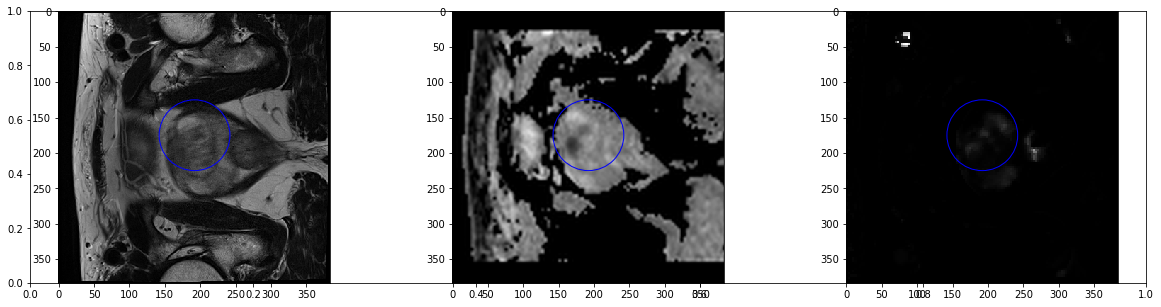

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

img = stack[1]
fig, axes = plt.subplots(figsize=(20,5))
for i in range (0,3):
    image = img[8,:,:,i]
    ax1 = fig.add_subplot(1, 3, i+1)
    plt.imshow(image,cmap ='gray')
    circ = Circle((192,175),50, fill=False, color='blue')
    ax1.add_patch(circ)
plt.show()